In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Hello World")

Hello World


In [2]:
bike_data = pd.read_csv("seoule_bike_2018_2019.csv", encoding="cp949")

bike_data

대여일자   대여건수  평균기온  강수량 요일
0    2018-01-01   4950  -1.3  NaN  월
1    2018-01-02   7136  -1.8  NaN  화
2    2018-01-03   7156  -4.7  NaN  수
3    2018-01-04   7102  -4.7  NaN  목
4    2018-01-05   7705  -3.0  NaN  금
..          ...    ...   ...  ... ..
450  2019-03-27  35832  11.6  NaN  수
451  2019-03-28  38806   9.4  NaN  목
452  2019-03-29  43893   9.2  NaN  금
453  2019-03-30  14001   5.2  1.8  토
454  2019-03-31  22326   4.4  0.0  일

[455 rows x 5 columns]

In [3]:
bike_data.describe()
# describe() 함수는 숫자형 자료의 통계만 보여준다.

대여건수        평균기온         강수량
count    455.000000  455.000000  152.000000
mean   26366.613187   10.913407    8.780921
std    15476.046814   11.302373   17.472805
min     1037.000000  -14.800000    0.000000
25%    13145.500000    1.900000    0.100000
50%    25537.000000    9.700000    1.000000
75%    39022.500000   21.100000    7.500000
max    64671.000000   33.700000   96.500000

In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여일자    455 non-null    object 
 1   대여건수    455 non-null    int64  
 2   평균기온    455 non-null    float64
 3   강수량     152 non-null    float64
 4   요일      455 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 17.9+ KB


In [5]:
bike_data.isnull().sum()

대여일자      0
대여건수      0
평균기온      0
강수량     303
요일        0
dtype: int64

In [6]:
bike_data[bike_data["강수량"].isnull()]

대여일자   대여건수  평균기온  강수량 요일
0    2018-01-01   4950  -1.3  NaN  월
1    2018-01-02   7136  -1.8  NaN  화
2    2018-01-03   7156  -4.7  NaN  수
3    2018-01-04   7102  -4.7  NaN  목
4    2018-01-05   7705  -3.0  NaN  금
..          ...    ...   ...  ... ..
448  2019-03-25  34226   7.3  NaN  월
449  2019-03-26  42644  11.4  NaN  화
450  2019-03-27  35832  11.6  NaN  수
451  2019-03-28  38806   9.4  NaN  목
452  2019-03-29  43893   9.2  NaN  금

[303 rows x 5 columns]

In [7]:
df_bkie = bike_data.fillna(0)
# fillna() 함수는 결측치를 0으로 채워넣는다.

df_bkie

대여일자   대여건수  평균기온  강수량 요일
0    2018-01-01   4950  -1.3  0.0  월
1    2018-01-02   7136  -1.8  0.0  화
2    2018-01-03   7156  -4.7  0.0  수
3    2018-01-04   7102  -4.7  0.0  목
4    2018-01-05   7705  -3.0  0.0  금
..          ...    ...   ...  ... ..
450  2019-03-27  35832  11.6  0.0  수
451  2019-03-28  38806   9.4  0.0  목
452  2019-03-29  43893   9.2  0.0  금
453  2019-03-30  14001   5.2  1.8  토
454  2019-03-31  22326   4.4  0.0  일

[455 rows x 5 columns]

In [8]:
df_bkie.isna().sum()

대여일자    0
대여건수    0
평균기온    0
강수량     0
요일      0
dtype: int64

In [9]:
plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

#  폰트 깨짐 처리

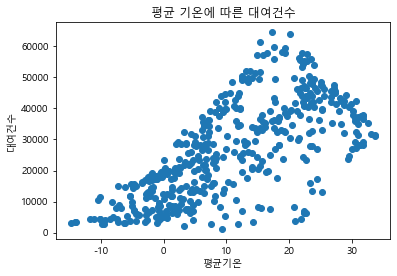

In [10]:
plt.scatter(df_bkie["평균기온"], df_bkie["대여건수"])

plt.title("평균 기온에 따른 대여건수")
plt.xlabel("평균기온")
plt.ylabel("대여건수")

plt.show()

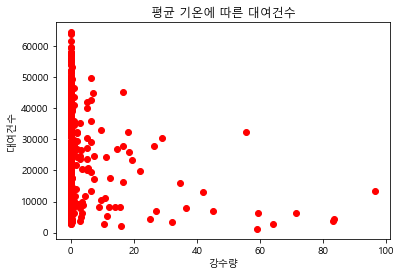

In [11]:
plt.scatter(df_bkie["강수량"], df_bkie["대여건수"], color="r")

plt.title("평균 기온에 따른 대여건수")
plt.xlabel("강수량")
plt.ylabel("대여건수")

plt.show()

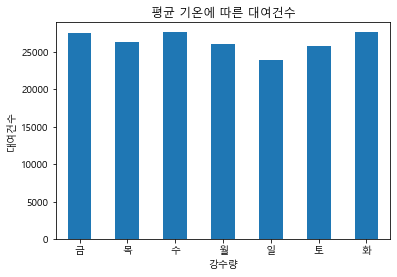

In [12]:
df_bike_week = df_bkie.groupby("요일").mean()["대여건수"]
# 요일 컬럼을 기준으로 그룹을 나눠준다.
# 만들어진 그룹별로 평균을 내준다.


# 판다스 자체의 시각화 도구이다.
# kind는 그래프의 형태, rot는 글자가 돌아갔는지 여부
df_bike_week.plot(kind="bar", rot=0)

plt.title("평균 기온에 따른 대여건수")
plt.xlabel("강수량")
plt.ylabel("대여건수")

plt.show()

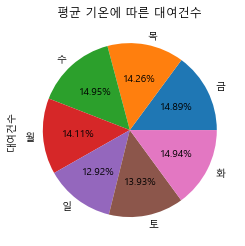

In [13]:
df_bike_week.plot(kind="pie", autopct="%.2f%%")

plt.title("평균 기온에 따른 대여건수")

plt.show()

In [14]:
# 원핫 인코딩
# 문자 데이터를 0과 1로만 이루어지게 만드는 인코딩

In [15]:
one_hot_week = pd.get_dummies(df_bkie["요일"])
# get_dummies() 함수는 원핫인코딩 해준다.

df_bkie_new = pd.concat([df_bkie, one_hot_week], axis=1)
# 원핫 인코딩된 요일 df를 기존df에 붙여준다.
# 이때 axis를 1로 주면 열로 붙인다

df_bkie_new

대여일자   대여건수  평균기온  강수량 요일  금  목  수  월  일  토  화
0    2018-01-01   4950  -1.3  0.0  월  0  0  0  1  0  0  0
1    2018-01-02   7136  -1.8  0.0  화  0  0  0  0  0  0  1
2    2018-01-03   7156  -4.7  0.0  수  0  0  1  0  0  0  0
3    2018-01-04   7102  -4.7  0.0  목  0  1  0  0  0  0  0
4    2018-01-05   7705  -3.0  0.0  금  1  0  0  0  0  0  0
..          ...    ...   ...  ... .. .. .. .. .. .. .. ..
450  2019-03-27  35832  11.6  0.0  수  0  0  1  0  0  0  0
451  2019-03-28  38806   9.4  0.0  목  0  1  0  0  0  0  0
452  2019-03-29  43893   9.2  0.0  금  1  0  0  0  0  0  0
453  2019-03-30  14001   5.2  1.8  토  0  0  0  0  0  1  0
454  2019-03-31  22326   4.4  0.0  일  0  0  0  0  1  0  0

[455 rows x 12 columns]

# 0518 수업 정리

In [16]:
# 필요 없는 컬럼들을 지워준다.

df_bkie_new.drop(["대여일자"], axis = 1, inplace=True)
df_bkie_new.drop(["요일"], axis = 1, inplace=True)

df_bkie_new.head()

대여건수  평균기온  강수량  금  목  수  월  일  토  화
0  4950  -1.3  0.0  0  0  0  1  0  0  0
1  7136  -1.8  0.0  0  0  0  0  0  0  1
2  7156  -4.7  0.0  0  0  1  0  0  0  0
3  7102  -4.7  0.0  0  1  0  0  0  0  0
4  7705  -3.0  0.0  1  0  0  0  0  0  0

In [17]:
data_input = df_bkie_new.drop(["대여건수"], axis=1)
print(data_input.shape)
data_input

(455, 9)


평균기온  강수량  금  목  수  월  일  토  화
0    -1.3  0.0  0  0  0  1  0  0  0
1    -1.8  0.0  0  0  0  0  0  0  1
2    -4.7  0.0  0  0  1  0  0  0  0
3    -4.7  0.0  0  1  0  0  0  0  0
4    -3.0  0.0  1  0  0  0  0  0  0
..    ...  ... .. .. .. .. .. .. ..
450  11.6  0.0  0  0  1  0  0  0  0
451   9.4  0.0  0  1  0  0  0  0  0
452   9.2  0.0  1  0  0  0  0  0  0
453   5.2  1.8  0  0  0  0  0  1  0
454   4.4  0.0  0  0  0  0  1  0  0

[455 rows x 9 columns]

In [18]:
data_target = df_bkie["대여건수"]

print(data_target.shape)
data_target

(455,)


0       4950
1       7136
2       7156
3       7102
4       7705
       ...  
450    35832
451    38806
452    43893
453    14001
454    22326
Name: 대여건수, Length: 455, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(data_input, data_target, shuffle=True)

print(input_train.shape, target_train.shape)
print(input_test.shape, target_test.shape)

(341, 9) (341,)
(114, 9) (114,)


In [21]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(input_train, target_train)

LinearRegression()

In [30]:
#input_bike_data = [list(np.zeros(9))]
input_bike_data = [[0, 0, 0, 0, 0, 0, 0, 0, 0]]

input_bike_data[0][0] = float(input("해당 날짜의 평균 기온은? : "))
input_bike_data[0][1] = float(input("해당 날짜의 강수량은? : "))
day = input("요일은? (월, 화, 수, 목, 금, 토, 일 중에서 하나 입력) : ")

for n, i in enumerate(["금", "목", "수", "월", "일", "토", "화"]):
    if(i == day):
        input_bike_data[0][2 + n] = 1;
    
#print(input_bike_data)


print(f"예측되는 공공자전거 대여 선수 : {model_lr.predict(input_bike_data)}대")

해당 날짜의 평균 기온은? : 0.4
해당 날짜의 강수량은? : 0
요일은? (월, 화, 수, 목, 금, 토, 일 중에서 하나 입력) : 금
예측되는 공공자전거 대여 선수 : [18554.32634558]대


# 0519 수업 정리
- 모델 평가

In [1]:
x = np.arange(np.min(target_test), np.max(target_test) + 1)

plt.plot(x, x, "r--")
# 

plt.scatter(target_test, model_lr.predict(input_test))
# 실제 값, 예측한 값을 비교한다.

plt.xlabel("실제 대여 건수")
plt.ylabel("예측 대여 건수")

plt.show()

NameError: name 'np' is not defined

In [38]:
print(f"훈련 데이터로 평가한 성능 점수 : {model_lr.score(input_train, target_train)}")
print(f"테스트 데이터로 평가한 성능 점수 : {model_lr.score(input_test, target_test)}")

훈련 데이터로 평가한 성능 점수 : 0.6204660392013228
테스트 데이터로 평가한 성능 점수 : 0.49198263517145613
